# Reading the Web Page into Python

In [1]:
import requests
import pandas as pd
import numpy as np

# url with data
r = requests.get('https://www.lotteryusa.com/mega-millions/mm-year.html')


In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.text, 'html.parser')

In [3]:
# Get table data and load in a pandas data frame

table = soup.find_all('table')[0] 
df = pd.read_html(str(table))[0]

In [4]:
# Remove all rows with nulls
df.dropna(inplace=True)

In [5]:
#Convert 'Date' column to actual dates
df['Date']=pd.to_datetime(df['Date'])

In [6]:
# Remove the 'Date' and "Jackpot" columns
#df.drop(['Date', 'Jackpot'], axis=1, inplace= True)
df.drop(['Jackpot'], axis=1, inplace= True)

In [7]:
# Expand 'Result' Column into multiple columns
df = df.join(df['Result'].str.split(' ', expand=True).add_prefix('D'))

In [8]:
# Remove the 'Result' columns
df.drop(['Result', 'D6','D7','D8', 'D9'], axis=1, inplace= True)

In [9]:
# Rename Column "Digit5" to "PB'
df.rename(index=str, columns={"D5": "PB"}, inplace=True)

In [10]:
# Set Date column as index
df.set_index('Date', inplace=True)

In [11]:
# Remove row index name
df.index.name = None


In [12]:
df=df.sort_index(ascending=False)

In [13]:
cols = ['D0', 'D1', 'D2', 'D3', 'D4','PB']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 104 entries, 2020-03-06 to 2019-03-12
Data columns (total 6 columns):
D0    104 non-null int64
D1    104 non-null int64
D2    104 non-null int64
D3    104 non-null int64
D4    104 non-null int64
PB    104 non-null int64
dtypes: int64(6)
memory usage: 5.7 KB


In [14]:
df.head()

,D0,D1,D2,D3,D4,PB
2020-03-06,15,48,56,58,70,4
2020-03-03,8,12,33,56,64,2
2020-02-28,2,3,14,41,64,17
2020-02-25,2,9,43,49,63,15
2020-02-21,4,7,13,16,60,6


In [46]:
dec19=df['2019-12'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
print(list(dec19.index))
print(len(dec19))
print(dec19)

[63, 56, 17, 31, 23, 61, 40, 20, 46, 53, 60, 30, 27, 18, 69, 21, 22, 3, 66, 35, 29, 34, 37, 39, 43, 44, 48, 49, 54, 55, 64]
31
63    3
56    3
17    2
31    2
23    2
61    2
40    2
20    2
46    2
53    2
60    2
30    2
27    1
18    1
69    1
21    1
22    1
3     1
66    1
35    1
29    1
34    1
37    1
39    1
43    1
44    1
48    1
49    1
54    1
55    1
64    1
dtype: int64


In [33]:
jan20=df['2020-01'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts().index
print(list(jan20))
print(len(jan20))

[31, 41, 62, 25, 37, 18, 17, 47, 51, 3, 13, 28, 16, 11, 9, 70, 23, 4, 27, 63, 29, 30, 33, 36, 38, 40, 42, 49, 52, 53, 54, 56, 57, 66]
34


In [36]:
feb20=df['2020-02'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts().index
print(list(feb20))
print('Count ',len(feb20))

[64, 32, 2, 4, 6, 52, 9, 48, 14, 27, 3, 7, 10, 12, 13, 16, 63, 61, 39, 41, 43, 49, 50, 51, 54, 55, 70, 60, 36]
Count  29


In [41]:
mar20=df['2020-03'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts().index
print(list(mar20))
print('Count ',len(mar20))

[56, 15, 12, 58, 8, 70, 64, 33, 48]
Count  9


In [40]:
diffJF=list(set(jan20) - set(feb20))
print((diffJF))
print('Count ',len(diffJF))

[33, 66, 37, 38, 40, 42, 11, 57, 47, 17, 18, 62, 53, 23, 56, 25, 28, 29, 30, 31]
Count  20


In [38]:
df.head(12)

,D0,D1,D2,D3,D4,PB
2020-03-06,15,48,56,58,70,4
2020-03-03,8,12,33,56,64,2
2020-02-28,2,3,14,41,64,17
2020-02-25,2,9,43,49,63,15
2020-02-21,4,7,13,16,60,6
2020-02-18,6,12,39,61,70,4
2020-02-14,10,32,48,54,55,18
2020-02-11,4,6,32,52,64,6
2020-02-07,9,14,27,36,52,4
2020-02-04,32,48,50,51,64,10


# Start Analysis

In [15]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
#Ranges
rng0to999=["%.2d" % i for i in range(1000)]
rng1to70t=["%.2d" % i for i in range(1 ,71)]
rng1to25=["%.1d" % i for i in range(26)]
rng1to70=[i for i in range(1,71)]
len(rng1to70)

70

In [17]:
vcd0=df.D0.value_counts()
#vcd0=df[:14].D0.value_counts()
print('Numbers picked more than once in period:',len(vcd0[vcd0>1]), '\nSum of numbers picked more than once:',(vcd0[vcd0>1]).sum())
print('List of numbers picked more than once', vcd0[vcd0>1].index)
print('Count of numbers picked once in period:',len(vcd0[vcd0==1]))
print('List of numbers picked once in period:\n',vcd0[vcd0==1])
vcd0.describe()

Numbers picked more than once in period: 24 
Sum of numbers picked more than once: 96
List of numbers picked more than once Int64Index([ 3,  4,  8, 10, 11, 17, 12,  7,  9,  5,  6, 18, 16, 13, 15,  2, 14,
             1, 19, 20, 22, 23, 24, 25],
           dtype='int64')
Count of numbers picked once in period: 8
List of numbers picked once in period:
 34    1
27    1
28    1
29    1
30    1
32    1
33    1
37    1
Name: D0, dtype: int64


count    32.000000
mean      3.250000
std       2.369157
min       1.000000
25%       1.750000
50%       2.000000
75%       5.000000
max       9.000000
Name: D0, dtype: float64

In [18]:
vcd0=df.D1.value_counts()
#vcd0=df[:14].D0.value_counts()
print('Numbers picked more than once in period:',len(vcd0[vcd0>1]), '\nSum of numbers picked more than once:',(vcd0[vcd0>1]).sum())
print('List of numbers picked more than once\n', vcd0[vcd0>1].index)
print('Count of numbers picked once in period:',len(vcd0[vcd0==1]))
print('List of numbers picked once in period:\n',vcd0[vcd0==1])
vcd0.describe()

Numbers picked more than once in period: 30 
Sum of numbers picked more than once: 95
List of numbers picked more than once
 Int64Index([24, 14, 20, 12,  9, 16, 17, 25, 27, 22, 30, 31,  4, 37, 11,  8,  6,
            38, 18, 19, 21, 15, 29, 33, 34, 36, 40, 41, 43, 47],
           dtype='int64')
Count of numbers picked once in period: 9
List of numbers picked once in period:
 26    1
58    1
35    1
42    1
44    1
48    1
50    1
53    1
59    1
Name: D1, dtype: int64


count    39.000000
mean      2.666667
std       1.561601
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       7.000000
Name: D1, dtype: float64

In [19]:
vcd0=df.D2.value_counts()
#vcd0=df[:14].D0.value_counts()
print('Numbers picked more than once in period:',len(vcd0[vcd0>1]), '\nSum of numbers picked more than once:',(vcd0[vcd0>1]).sum())
print('List of numbers picked more than once', vcd0[vcd0>1].index)
print('Count of numbers picked once in period:',len(vcd0[vcd0==1]))
print('List of numbers picked once in period:\n',vcd0[vcd0==1])
vcd0.describe()

Numbers picked more than once in period: 32 
Sum of numbers picked more than once: 93
List of numbers picked more than once Int64Index([34, 31, 44, 30, 23, 24, 40, 42, 29, 37, 28, 39, 27, 25, 47, 49, 22,
            14, 26, 13, 32, 17, 11, 10, 53, 36, 58, 41, 56, 46, 48, 60],
           dtype='int64')
Count of numbers picked once in period: 11
List of numbers picked once in period:
 33    1
55    1
15    1
16    1
50    1
18    1
21    1
45    1
43    1
38    1
66    1
Name: D2, dtype: int64


count    43.000000
mean      2.418605
std       1.257976
min       1.000000
25%       1.500000
50%       2.000000
75%       3.000000
max       6.000000
Name: D2, dtype: float64

In [20]:
vcd0=df.D3.value_counts()
#vcd0=df[:14].D0.value_counts()
print('Numbers picked more than once in period:',len(vcd0[vcd0>1]), '\nSum of numbers picked more than once:',(vcd0[vcd0>1]).sum())
print('List of numbers picked more than once', vcd0[vcd0>1].index)
print('Count of numbers picked once in period:',len(vcd0[vcd0==1]))
print('List of numbers picked once in period:\n',vcd0[vcd0==1])
vcd0.describe()

Numbers picked more than once in period: 30 
Sum of numbers picked more than once: 93
List of numbers picked more than once Int64Index([48, 43, 56, 51, 40, 54, 52, 42, 35, 34, 49, 50, 39, 53, 57, 59, 61,
            62, 63, 38, 31, 33, 24, 37, 23, 67, 44, 47, 60, 65],
           dtype='int64')
Count of numbers picked once in period: 11
List of numbers picked once in period:
 41    1
36    1
66    1
46    1
32    1
55    1
30    1
27    1
26    1
19    1
17    1
Name: D3, dtype: int64


count    41.000000
mean      2.536585
std       1.566805
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       9.000000
Name: D3, dtype: float64

In [21]:
vcd0=df.D4.value_counts()
#vcd0=df[:14].D0.value_counts()
print('Numbers picked more than once in period:',len(vcd0[vcd0>1]), '\nSum of numbers picked more than once:',(vcd0[vcd0>1]).sum())
print('List of numbers picked more than once', vcd0[vcd0>1].index)
print('Count of numbers picked once in period:',len(vcd0[vcd0==1]))
print('List of numbers picked once in period:\n',vcd0[vcd0==1])
vcd0.describe()

Numbers picked more than once in period: 24 
Sum of numbers picked more than once: 97
List of numbers picked more than once Int64Index([68, 62, 64, 63, 70, 65, 66, 60, 56, 58, 55, 67, 48, 46, 57, 54, 52,
            61, 38, 39, 43, 45, 59, 53],
           dtype='int64')
Count of numbers picked once in period: 7
List of numbers picked once in period:
 47    1
50    1
51    1
69    1
37    1
31    1
25    1
Name: D4, dtype: int64


count    31.000000
mean      3.354839
std       2.153267
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       8.000000
Name: D4, dtype: float64

In [22]:
vcd0=df.PB.value_counts()
#vcd0=df[:14].D0.value_counts()
print('Numbers picked more than the mean in period:',len(vcd0[vcd0>vcd0.mean()]), '\nSum of numbers picked more than once:',(vcd0[vcd0>1]).sum())
print('List of numbers picked more than once', vcd0[vcd0>vcd0.mean()].index)
print('\nCount of numbers picked less than the mean in period:',len(vcd0[vcd0<vcd0.mean()]))
print('List of numbers picked once in period:\n',vcd0[vcd0<1])
vcd0.describe()

Numbers picked more than the mean in period: 10 
Sum of numbers picked more than once: 104
List of numbers picked more than once Int64Index([10, 21, 11, 4, 20, 19, 6, 9, 24, 22], dtype='int64')

Count of numbers picked less than the mean in period: 15
List of numbers picked once in period:
 Series([], Name: PB, dtype: int64)


count    25.000000
mean      4.160000
std       1.885913
min       2.000000
25%       3.000000
50%       4.000000
75%       6.000000
max       8.000000
Name: PB, dtype: float64

In [23]:
df.D0.value_counts()

3     9
4     8
8     7
10    7
11    7
17    6
12    5
7     5
9     5
5     4
6     4
18    4
16    3
13    2
15    2
2     2
14    2
1     2
19    2
20    2
22    2
23    2
24    2
25    2
34    1
27    1
28    1
29    1
30    1
32    1
33    1
37    1
Name: D0, dtype: int64

In [24]:
df.D1.value_counts()

24    7
14    7
20    6
12    5
9     4
16    4
17    4
25    4
27    3
22    3
30    3
31    3
4     3
37    3
11    3
8     3
6     3
38    3
18    2
19    2
21    2
15    2
29    2
33    2
34    2
36    2
40    2
41    2
43    2
47    2
26    1
58    1
35    1
42    1
44    1
48    1
50    1
53    1
59    1
Name: D1, dtype: int64

In [17]:
print("These are the numbers that have been picked Oct-Nov 2019")
vcMG=df[1:9][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
#print(len(vcMG[vcMG>vcMG.mean()]))
print('count of num:',len(vcMG.index))
print(vcMG.index)
np=set(rng1to70).difference(vcMG.index)
print(len(np))
print(np)

These are the numbers that have been picked Oct-Nov 2019
count of num: 31
Int64Index([63, 53, 56, 17, 30, 37, 54, 55, 66,  3, 60, 18, 20, 21, 22, 23, 27,
            29, 31, 49, 34, 35, 61, 39, 40, 41, 42, 44, 46, 48, 64],
           dtype='int64')
39
{1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 24, 25, 26, 28, 32, 33, 36, 38, 43, 45, 47, 50, 51, 52, 57, 58, 59, 62, 65, 67, 68, 69, 70}


### Current data Analysis

In [19]:
print("These are the numbers that have been picked Oct-Nov 2019")
vcMG=df['2018-10':'2018-11'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
#print(len(vcMG[vcMG>vcMG.mean()]))
print(vcMG.index)
np=set(rng1to70).difference(vcMG.index)
print(len(np))
print(np)

These are the numbers that have been picked Oct-Nov 2019
Int64Index([], dtype='int64')
70
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70}


df['2018'][['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts(normalize=True)

In [25]:
vcD0=df.D0.value_counts()#Plot Customizations
sns.set() # matplotlib defaults

plt.rcParams['figure.figsize'] = (12,3)
%config InlineBackend.figure_format='retina'

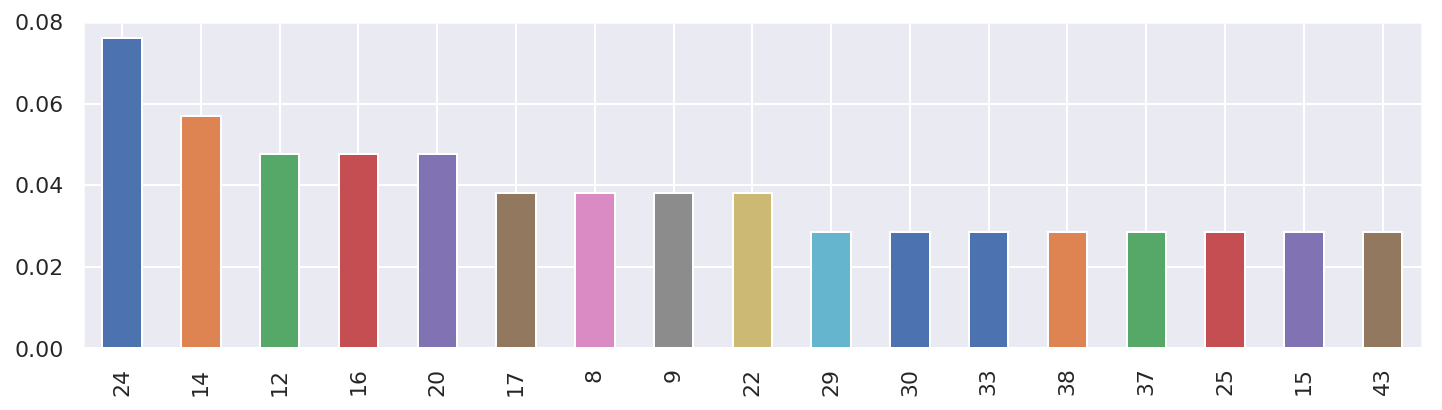

In [26]:
vcD1=df.D1.value_counts(normalize=True)
vcD1[vcD1>vcD1.mean()].plot(kind='bar')

In [28]:
#Combine ShiftUp and ShiftUpDiff columns
df['DN0']=df.D0.astype(str) + '_'+df.S_Up0.astype(str)
#df['DN0']=df['DN0'].str[:2]

In [29]:
#Combine ShiftUp and ShiftUpDiff columns
df['DN1']=df.D1.astype(str) + '_'+df.S_Up1.astype(str)
#df['DN1']=df['DN1'].str[:2]

In [30]:
#Combine ShiftUp and ShiftUpDiff columns
df['DN2']=df.D2.astype(str) + '_'+df.S_Up2.astype(str)
#df['DN2']=df['DN2'].str[:2]

In [31]:
#Combine ShiftUp and ShiftUpDiff columns
df['DN3']=df.D3.astype(str) + '_'+df.S_Up3.astype(str)
#df['DN3']=df['DN3'].str[:2]

In [32]:
#Combine ShiftUp and ShiftUpDiff columns
df['DN4']=df.D4.astype(str) + '_'+df.S_Up4.astype(str)
#df['DN4']=df['DN4'].str[:2]

In [33]:
#Combine ShiftUp and ShiftUpDiff columns
df['DNPB']=df.PB.astype(str) + '_'+df.S_PB.astype(str)
#df['DN0']=df['DN0'].str[:2]

In [34]:
vcMG=df[['D0', 'D1', 'D2', 'D3', 'D4']].stack().value_counts()
len(vcMG[vcMG>vcMG.mean()])

33

In [35]:
df.tail()

,D0,D1,D2,D3,D4,PB,S_Up0,S_Up1,S_Up2,S_Up3,S_Up4,S_PB,DN0,DN1,DN2,DN3,DN4,DNPB
2018-11-13,34,46,57,65,69,11,33,36,63,68,69,16,34_33,46_36,57_63,65_68,69_69,11_16
2018-11-16,33,36,63,68,69,16,10,16,31,42,66,10,33_10,36_16,63_31,68_42,69_66,16_10
2018-11-20,10,16,31,42,66,10,7,10,30,33,59,23,10_7,16_10,31_30,42_33,66_59,10_23
2018-11-23,7,10,30,33,59,23,12,24,37,42,57,18,7_12,10_24,30_37,33_42,59_57,23_18
2018-11-27,12,24,37,42,57,18,0,0,2,3,4,0,12_0,24_0,37_2,42_3,57_4,18_0


In [36]:
mg0=df['PB'].value_counts()
mg0[mg0>mg0.mean()]
mg0

23    7
9     7
1     6
11    6
22    6
20    6
2     5
17    5
16    5
14    5
10    5
5     4
7     4
13    4
12    4
24    3
8     3
18    3
19    3
4     3
3     3
25    3
6     2
21    2
15    1
Name: PB, dtype: int64

In [37]:
mg1=df['DN1'].value_counts().sort_index()
mg1[mg1>mg1.mean()]


11_17    2
17_22    2
4_17     2
Name: DN1, dtype: int64

In [38]:
vcPB=df.PB.value_counts().sort_index()
vcPBMn=vcPB.mean()
vcPB[vcPB>vcPBMn]

1     6
2     5
9     7
10    5
11    6
14    5
16    5
17    5
20    6
22    6
23    7
Name: PB, dtype: int64

In [39]:
picked09=df[:14][['Digit0', 'Digit1', 'Digit2', 'Digit3', 'Digit4']].stack().value_counts()
vcMn=picked09.mean()
#picked[picked> vcMn]
print("Count of numbers picked in 14 days", len(picked09))
#print(picked[picked> vcMn])
print(picked09)

KeyError: "['Digit0' 'Digit1' 'Digit2' 'Digit3' 'Digit4'] not in index"

In [ ]:
vcD0=df.Digit0.value_counts()#.plot(kind='bar')
vcD0Mn=vcD0.mean()
vcD0[vcD0>=vcD0Mn+2].plot(kind='bar')

In [ ]:
vcD1=df.Digit1.value_counts()#.plot(kind='bar')
vcD1Mn=vcD1.mean()
vcD1[vcD1>=vcD1Mn+2].plot(kind='bar')

In [ ]:
vcD2=df.Digit2.value_counts()#.plot(kind='bar')
vcD2Mn=vcD2.mean()
vcD2[vcD2>=vcD2Mn+1].plot(kind='bar')

In [ ]:
vcD3=df.Digit3.value_counts()#.plot(kind='bar')
vcD3Mn=vcD3.mean()
vcD3[vcD3>=vcD3Mn+1].plot(kind='bar')

In [ ]:
picked11=df['2018-11'][['Digit0', 'Digit1', 'Digit2', 'Digit3', 'Digit4']].stack().value_counts().sort_index()
vcMn11=picked11.mean()
#picked[picked> vcMn]
print("Count of numbers picked in 14 days", len(picked11))
#print(picked[picked> vcMn])
print(picked11)

In [ ]:
picked10=df['2018-10'][['Digit0', 'Digit1', 'Digit2', 'Digit3', 'Digit4']].stack().value_counts().sort_index()
vcMn=picked10.mean()
#picked[picked> vcMn]
print("Count of numbers picked in 14 days", len(picked10))
#print(picked[picked> vcMn])
print(picked10)

In [ ]:
SD9_10 = set(picked10.index).symmetric_difference(picked09.index)
#Notpicked = set(picked10.index).intersection(picked09.index)


set(SD9_10).symmetric_difference(picked11.index)

In [ ]:
#Percentage of First2 numbers picked and not picked in a 100 day interval
#import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Numbers Not Picked', 'Numbers picked'
sizes = [len(Notpicked),len(picked)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
NumPkMoreThanOnce = picked[picked>1]
#NumPkOnce=df18[:100]['First2'].value_counts()
NumPkOnce = picked[picked==1]

In [ ]:
#Percentage of First2 numbers picked more or less than once in a 100 day interval
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'NumPkMoreThanOnce', 'NumPkOnce'
sizes = [len(NumPkMoreThanOnce),len(NumPkOnce)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
test=df.stack()

In [ ]:
df.iloc[:14]['PB'].plot(5)

In [ ]:
df[:14][['Digit0', 'Digit1', 'Digit2', 'Digit3', 'Digit4']].stack().value_counts().plot(kind='bar', figsize=(15,4))
#df18[:100]['Digit0'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
df.head()

# Analysis PowerBall

In [ ]:
df[:14]['PB'].value_counts().plot(kind='bar', figsize=(10,4))

In [ ]:
df[:28]['PB'].value_counts().plot(kind='bar', figsize=(10,4))

In [ ]:
df[:56]['PB'].value_counts().plot(kind='bar', figsize=(10,4))

In [ ]:
df[:140]['PB'].value_counts().plot(kind='bar', figsize=(10,4))

# Convert columns from objects to integers

In [ ]:
df['Digit0'] = df['Digit0'].astype(str).astype(int)

In [ ]:
df['Digit1'] = df['Digit1'].astype(str).astype(int)

In [ ]:
df['Digit2'] = df['Digit2'].astype(str).astype(int)

In [ ]:
df['Digit3'] = df['Digit3'].astype(str).astype(int)

In [ ]:
df['Digit4'] = df['Digit4'].astype(str).astype(int)

In [ ]:
df['PB'] = df['PB'].astype(str).astype(int)

q = df["Digit0"].quantile(0.8)
q

In [ ]:
df.set_index('Date', inplace=True)
df.head()

In [ ]:
#stack digit columns toget total value counts of most recent 14 drawings
 
lotto14= df[:14][['Digit0', 'Digit1', 'Digit2', 'Digit3', 'Digit4']].stack().value_counts()
MostRecent14=lotto14.index

lotto28= df[:28][['Digit0', 'Digit1', 'Digit2', 'Digit3', 'Digit4']].stack().value_counts()
MostRecent28=lotto28.index

MostRecent14.value_counts()

MostRecent28.value_counts()

In [ ]:
#Range of megamilion numbers
    #print(i)
numrange = []
for i in range(1, 71):
    numrange.append(i)
  

In [ ]:
diff28 = set(numrange).symmetric_difference(MostRecent28)
diff28

#Select from these numbers
#diff of numbers that were not pull between the 14 & 28 drawings
a=diff28
b=numrange
set(a).symmetric_difference(b)

In [ ]:
#Select from these numbers
#diff of numbers that were not pull between the 14 & 28 drawings
a=diff14
b=diff28
set(a).symmetric_difference(b)

In [ ]:
df[['Digit0', 'Digit1', 'Digit2', 'Digit3', 'Digit4']].stack().value_counts().head(40)

In [ ]:
#Range of megamilion PB numbers
PwrballRange = []
for i in range(1, 26):
    PwrballRange.append(i)

In [ ]:
df.head()

In [ ]:
numcountall=df[['Digit0', 'Digit1', 'Digit2', 'Digit3', 'Digit4']].stack().value_counts()

In [ ]:
PB14 = df[:14][['PB']].stack().value_counts()
PB14i =PB14.index
PB28 = df[:28][['PB']].stack().value_counts()
PB28i =PB28.index

In [ ]:
#Select from these numbers
#all the power numbers that were not pull for the last 20 drawings

c=PB14i
d=PB28i
set(c).symmetric_difference(d)

In [ ]:
PB14i

In [ ]:
df['PB'].value_counts(normalize=True).head(11)

#pb diff between 14 and 28 drawings
diffpb=PB28.index
e=diffpb
f=pb2.index
set(f).intersection(e)

In [ ]:
sns.pairplot(df)

In [ ]:
# Assign feature columns as list:feature_cols
feature_cols = ['Date']

# Assign to X a subset of the data including only feature columns
x = df[feature_cols]


In [ ]:
# Assign to y the reponse variable as Pandas series
y = df['Digit0']

In [ ]:
# Import SK learn train test split
from sklearn.model_selection import train_test_split

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [ ]:
df.info()

# Import SK Learn linear regression
from sklearn.linear_model import LinearRegression

#Instantiate
linreg = LinearRegression()

#Fit Model to training data i,e) Learn coefficients
linreg.fit(X_train, y_train)

In [ ]:
df[:28]['Digit0'].plot(kind ='hist' , x='Digit0', figsize=(16,6), bins=40)
#plt.subplot(df['Digit0'])
#plt.xlabel("Day")
#plt.ylabel("Lotto Numbers")
#plt.figure(1, figsize=(9, 3))
df['Digit0'].describe()

In [ ]:
df[:20]['Digit1'].plot(kind ='hist' , x='Digit1', figsize=(16,6), bins=40)
#plt.subplot(df['Digit0'])
#plt.xlabel("Day")
#plt.ylabel("Lotto Numbers")
#plt.figure(1, figsize=(9, 3))
df['Digit1'].describe()

In [ ]:
df['Digit2'].plot(kind ='hist' , x='Digit2', figsize=(16,6), bins=30)
#plt.subplot(df['Digit0'])
#plt.xlabel("Day")
#plt.ylabel("Lotto Numbers")
#plt.figure(1, figsize=(9, 3))
df['Digit2'].describe()

In [ ]:
df['Digit3'].plot(kind ='hist' , x='Digit3', figsize=(16,6), bins=50)
#plt.subplot(df['Digit0'])
#plt.xlabel("Day")
#plt.ylabel("Lotto Numbers")
#plt.figure(1, figsize=(9, 3))
df['Digit3'].describe()

In [ ]:
df['Digit4'].plot(kind ='hist' , x='Digit4', figsize=(16,6), bins=50)
#plt.subplot(df['Digit0'])
#plt.xlabel("Day")
#plt.ylabel("Lotto Numbers")
#plt.figure(1, figsize=(9, 3))
df['Digit4'].describe()

In [ ]:
df['PB'].plot(kind ='hist' , x='PB', figsize=(16,6), bins=50)
#plt.subplot(df['Digit0'])
plt.xlabel("Number")
#plt.ylabel("Lotto Numbers")
#plt.figure(1, figsize=(9, 3))
df['PB'].describe()